In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
list (iris.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data
Y = iris.target

In [5]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(report)


Accuracy: 86.67%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [7]:
### Вместо XGB повторить с  LightGBM https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
### Построить гистограммы на matplotlib всех 4х параметров

In [8]:
import lightgbm as lgb
from matplotlib import pyplot as plt

In [9]:
data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

gbm = lgb.train({'objective': 'multiclass', 'num_class': 3, 'verbose': -1}, lgb.Dataset(X_train, y_train))
clf = lgb.LGBMClassifier(verbose=-1).fit(X_train, y_train)

y_pred = clf.predict(X_test)

gbm = lgb.LGBMRegressor(n_estimators=10, silent=True)
gbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(report)

Accuracy: 93.33%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [10]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Text(0.5, 1.0, 'petal length')

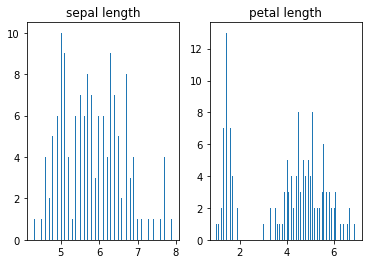

In [12]:
fig, axs = plt.subplots(1, 2)
n_bins = len(data)
axs[0].hist(data['sepal length (cm)'], bins=n_bins)
axs[0].set_title('sepal length')
axs[1].hist(data['petal length (cm)'], bins=n_bins)
axs[1].set_title('petal length')

Text(0.5, 1.0, 'petal width')

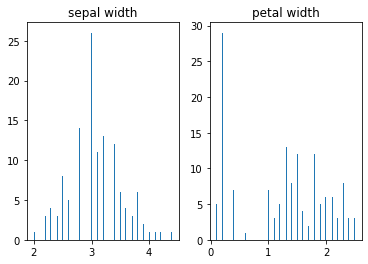

In [13]:
fig, axs = plt.subplots(1, 2)
n_bins = len(data)
axs[0].hist(data['sepal width (cm)'], bins=n_bins)
axs[0].set_title('sepal width')
axs[1].hist(data['petal width (cm)'], bins=n_bins)
axs[1].set_title('petal width')